In [1]:
# model 1 with flatten layer


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: C:\Users\Krunal\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


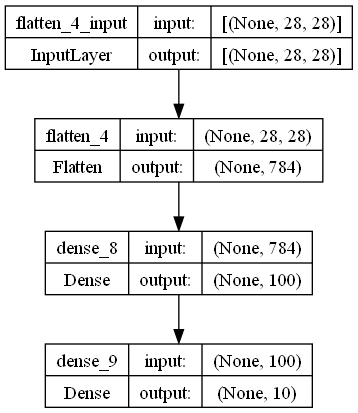

In [9]:
from tensorflow.keras import models
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
import graphviz

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the input
    layers.Dense(100, activation='relu'),  # Hidden layer with 100 neurons and ReLU activation
    layers.Dense(10, activation='sigmoid')  # Output layer with 10 neurons and Sigmoid activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Generate and save the diagram as an image with layers, shapes, and node visualization
plot_model(model, to_file='model_diagram_with_nodes.png', show_shapes=True, show_layer_names=True, dpi=96)

# Display the generated model diagram with node connections
from IPython.display import Image
Image(filename='model_diagram_with_nodes.png')


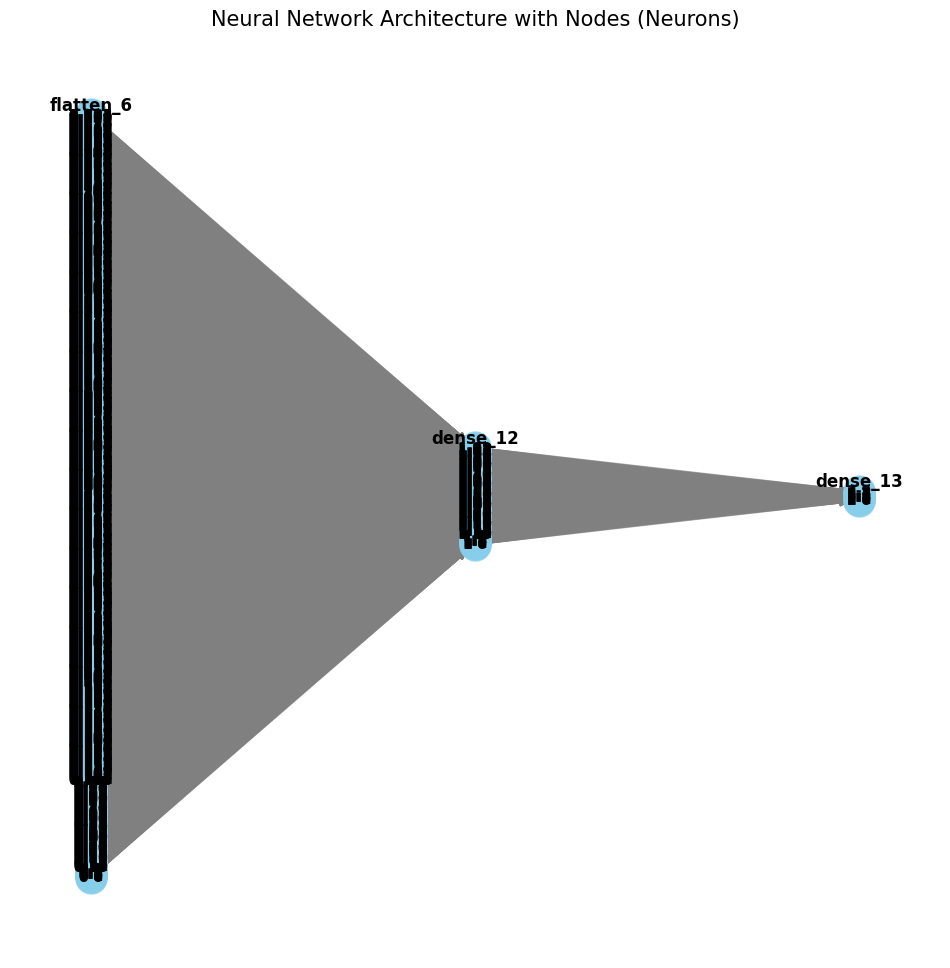

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from tensorflow.keras import layers, models  # Correct import for layers

def plot_neural_network(model):
    # Create a new figure
    plt.figure(figsize=(12, 12))

    # Create a directed graph
    G = nx.DiGraph()

    # List to store layer names and layer sizes
    layer_names = []
    layer_sizes = []

    # Get the model layer sizes
    for layer in model.layers:
        if isinstance(layer, layers.Flatten):
            # Flatten layer should transform input into a 1D vector
            layer_sizes.append(np.prod(layer.input_shape[1:]))  # Flatten: (28,28) -> 784
        elif isinstance(layer, layers.Dense):
            # Dense layer: number of neurons is defined by units
            layer_sizes.append(layer.units)
        else:
            continue
        layer_names.append(layer.name)

    # Positions for each layer
    layer_positions = {}
    pos_x = 0
    for i, layer_size in enumerate(layer_sizes):
        layer_positions[i] = np.linspace(-layer_size / 2, layer_size / 2, layer_size)
    
    # Add nodes for each layer (neurons as circles)
    for i, layer_size in enumerate(layer_sizes):
        for j in range(layer_size):
            G.add_node(f"{i}-{j}", layer=i, node=j)

    # Add edges between layers
    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i + 1]):
                G.add_edge(f"{i}-{j}", f"{i+1}-{k}")

    # Draw the graph with custom positions
    node_pos = {}
    for layer_idx in range(len(layer_sizes)):
        x_pos = layer_idx
        y_pos = layer_positions[layer_idx]
        for i, y in enumerate(y_pos):
            node_pos[f"{layer_idx}-{i}"] = (x_pos, y)

    # Draw nodes (neurons as circles)
    nx.draw_networkx_nodes(G, node_pos, node_size=500, node_color='skyblue', alpha=0.7)

    # Draw edges (connections between neurons)
    nx.draw_networkx_edges(G, node_pos, edgelist=G.edges(), width=1.0, alpha=0.5, edge_color='gray')

    # Draw labels (neuron indices and layer names)
    nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='black', font_weight='bold')
    
    # Draw layer names above the first row of each layer
    for i, layer_name in enumerate(layer_names):
        plt.text(i, max(layer_positions[i]), layer_name, ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Remove axis and show the plot
    plt.axis('off')
    plt.title('Neural Network Architecture with Nodes (Neurons)', fontsize=15)
    plt.show()

# Create a simple model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the input
    layers.Dense(100, activation='relu'),  # Hidden layer with 100 neurons and ReLU activation
    layers.Dense(10, activation='sigmoid')  # Output layer with 10 neurons and Sigmoid activation
])

# Plot the neural network with nodes (neurons)
plot_neural_network(model)
